# Neural Network 101 avec pytorch

In [300]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

torch.manual_seed(42)


## Qu'est-ce qu'un neural network

**Architecture:**

![](./content/nn_architecture.drawio.png)


**Classification:**

![](./content/nn_classification.drawio.png)

**Regression:**

![](./content/nn_regression.drawio.png)


## Comment ça marche

![](./content/nn_matrix_values.drawio.png)

**Forward pass, calculer les logits:**

In [301]:
def sigmoid(matrix):
    return 1/(1 + np.exp(-matrix))

X = np.array([
    [0.3, 0.4, 0.2]
])

W_1 = np.array([
    [0.24, 0.31],
    [0.72, -0.04],
    [0.14, -0.45]
])

H = np.dot(X, W_1)
H_activated = sigmoid(H)

W_2 = np.array([
    [-0.34, 0.99, 0.13],
    [-0.27, -0.45, 0.64]
])

Y = np.dot(H_activated, W_2)

print(f'H: {H}')
print(f'H_activated: {H_activated}')
print(f'Y: {Y}')


H: [[ 0.388 -0.013]]
H_activated: [[0.59580115 0.49675005]]
Y: [[-0.3366949   0.36630562  0.39537418]]


**Identifier la classe choisie:**

([<matplotlib.patches.Wedge at 0x20dbf1b9600>,
 [Text(0.8977538451983288, 0.6356398614243881, '0'),
  Text(-0.8656069664853716, 0.6787669552740417, '1'),
  Text(0.314227862911688, -1.0541635784687087, '2')],
 [Text(0.4896839155627247, 0.3467126516860299, '19.6%'),
  Text(-0.4721492544465663, 0.3702365210585682, '39.6%'),
  Text(0.171397016133648, -0.5749983155283865, '40.8%')])

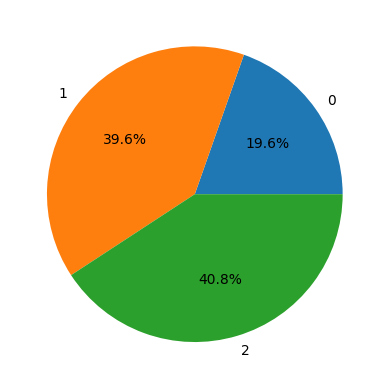

In [302]:
def softmax(matrix):
    return np.exp(matrix)/sum(np.exp(matrix))

probabilities = softmax(Y[0])

labels = '0', '1', '2'

fig, ax = plt.subplots()
ax.pie(probabilities, labels=labels, autopct='%1.1f%%')

## Pytorch

- Framework de machine learning qui peux rouler sur GPU
- Implémente une librarie de calcul pour tensor (matrice) qui permet d'effectuer les chaîne de dérivation automatique
- Inclu pleins d'outil dont des loader de données, la parralelisation de calcul et des intégrations avec des outils de big data dont spark.
- La librairie de calcul matricielle est a une interface quasiment identique à celle de numpy

**Example: Forward pass, calculer les logits avec pytorch**

In [303]:
Xs = torch.tensor([
    [1., 0.],
    [0., 1.]
])

Ys = torch.tensor([
    [0.],
    [1.]
])

layer = nn.Linear(2, 1) # Inclut W et retourne H sans activation

predictions = layer(Xs)
predictions

tensor([[0.3750],
        [0.4212]], grad_fn=<AddmmBackward0>)

**Example apprentissage avec pytorch:**

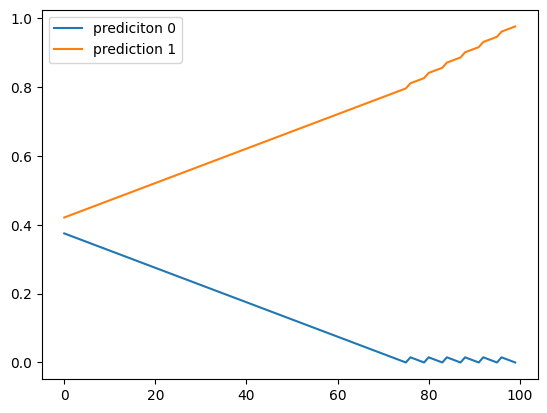

In [304]:
loss_fn = torch.nn.L1Loss()
optimizer = torch.optim.SGD(layer.parameters(), lr=0.01)

epochs = []
prediction_0s = []
prediction_1s = []

# Training loop
for epoch in range(100):
    optimizer.zero_grad()
    
    predictions = layer(Xs)
    loss = loss_fn(Ys, predictions)
    
    loss.backward()
    optimizer.step()
    
    # Construct learning graph
    epochs.append(epoch)
    prediction_0s.append(predictions[0].item())
    prediction_1s.append(predictions[1].item())
    
labels = ['prediciton 0', 'prediction 1']

plt.plot(epochs, prediction_0s, label = "prediciton 0") 
plt.plot(epochs, prediction_1s, label = "prediction 1") 
plt.legend() 
plt.show()